# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import math
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

#spliting the cities data into multiple lists
num_of_lists = math.ceil(len(cities)/50)

print("Beginning Data Retreival")
print("-------------------------")

bins = []
row = 0
col = 0
i = 0
j = 50

City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
MaxTemp = []
WindSpeed = []

#Splitting the cities list into multiple lists, each with length 50.
for row in range(num_of_lists):
    colmn = []
    #slicing the cities list
    colmn = cities[i:j:1] 
    bins.append(colmn)
    i = j
    j = j + 50

#Calling the API multiple times for each city
for r in range(num_of_lists):
    for c in range(len(bins[r])):
        cbin = c + 1
        rbin = r + 1 
        
        query_url= f"{url}appid={api_key}&q={format(bins[r][c])}"

        # Get weather data
        city_response = requests.get(query_url)
        #weather_response.status_code
        try:
            city_response.raise_for_status()
            print(f"Processing Record {cbin} of Set {rbin} | {bins[r][c]} ")
            
            city_json = city_response.json()
            
            City.append(city_json['name'])
            Cloudiness.append(city_json['clouds']['all'])
            Country.append(city_json['sys']['country'])
            Date.append(city_json['dt'])
            Humidity.append(city_json['main']['humidity'])
            Lat.append(city_json['coord']['lat'])
            Lng.append(city_json['coord']['lon'])
            MaxTemp.append(city_json['main']['temp_max'])
            WindSpeed.append(city_json['wind']['speed'])
        except requests.exceptions.HTTPError as e:
            print(f"City NOT Found!!!!!!...Skipping...")
            
print("--------------------------")
print("Data Retreival Complete")
print("--------------------------")

Beginning Data Retreival
-------------------------
Processing Record 1 of Set 1 | rikitea 
Processing Record 2 of Set 1 | remedios 
Processing Record 3 of Set 1 | acapulco 
Processing Record 4 of Set 1 | vallenar 
Processing Record 5 of Set 1 | hermanus 
Processing Record 6 of Set 1 | bushenyi 
Processing Record 7 of Set 1 | ewa beach 
Processing Record 8 of Set 1 | busselton 
Processing Record 9 of Set 1 | jamestown 
Processing Record 10 of Set 1 | hithadhoo 
Processing Record 11 of Set 1 | ushuaia 
Processing Record 12 of Set 1 | nome 
Processing Record 13 of Set 1 | kautokeino 
Processing Record 14 of Set 1 | norman wells 
Processing Record 15 of Set 1 | sale 
City NOT Found!!!!!!...Skipping...
Processing Record 17 of Set 1 | inhambane 
Processing Record 18 of Set 1 | victoria 
Processing Record 19 of Set 1 | faya 
Processing Record 20 of Set 1 | mataura 
Processing Record 21 of Set 1 | bethel 
Processing Record 22 of Set 1 | punta arenas 
Processing Record 23 of Set 1 | hilo 
Proce

Processing Record 48 of Set 4 | ponta delgada 
Processing Record 49 of Set 4 | pevek 
Processing Record 50 of Set 4 | ust-nera 
Processing Record 1 of Set 5 | weinan 
Processing Record 2 of Set 5 | nushki 
Processing Record 3 of Set 5 | manali 
Processing Record 4 of Set 5 | cherskiy 
Processing Record 5 of Set 5 | shenzhen 
Processing Record 6 of Set 5 | ketchikan 
City NOT Found!!!!!!...Skipping...
Processing Record 8 of Set 5 | barra 
Processing Record 9 of Set 5 | troitsko-pechorsk 
Processing Record 10 of Set 5 | ahtopol 
Processing Record 11 of Set 5 | pisco 
Processing Record 12 of Set 5 | longyearbyen 
Processing Record 13 of Set 5 | pangnirtung 
Processing Record 14 of Set 5 | nanortalik 
City NOT Found!!!!!!...Skipping...
Processing Record 16 of Set 5 | bathsheba 
Processing Record 17 of Set 5 | vila franca do campo 
Processing Record 18 of Set 5 | wanning 
Processing Record 19 of Set 5 | champerico 
Processing Record 20 of Set 5 | baykit 
Processing Record 21 of Set 5 | arra

Processing Record 46 of Set 8 | kutulik 
Processing Record 47 of Set 8 | richards bay 
Processing Record 48 of Set 8 | maceio 
City NOT Found!!!!!!...Skipping...
Processing Record 50 of Set 8 | benemerito de las americas 
Processing Record 1 of Set 9 | kampong cham 
City NOT Found!!!!!!...Skipping...
Processing Record 3 of Set 9 | kajaani 
Processing Record 4 of Set 9 | udachnyy 
Processing Record 5 of Set 9 | valle de allende 
Processing Record 6 of Set 9 | tari 
Processing Record 7 of Set 9 | paramonga 
Processing Record 8 of Set 9 | uvinza 
Processing Record 9 of Set 9 | najran 
Processing Record 10 of Set 9 | aloleng 
Processing Record 11 of Set 9 | la plata 
Processing Record 12 of Set 9 | veraval 
Processing Record 13 of Set 9 | yining 
Processing Record 14 of Set 9 | zemaiciu naumiestis 
Processing Record 15 of Set 9 | chapais 
Processing Record 16 of Set 9 | codrington 
Processing Record 17 of Set 9 | muros 
Processing Record 18 of Set 9 | santa maria 
Processing Record 19 of S

Processing Record 40 of Set 12 | zaysan 
Processing Record 41 of Set 12 | kulhudhuffushi 
Processing Record 42 of Set 12 | ripky 
Processing Record 43 of Set 12 | chiang rai 
Processing Record 44 of Set 12 | kang 
Processing Record 45 of Set 12 | guerrero negro 
Processing Record 46 of Set 12 | ljubinje 
Processing Record 47 of Set 12 | jacareacanga 
Processing Record 48 of Set 12 | dingli 
City NOT Found!!!!!!...Skipping...
Processing Record 50 of Set 12 | soyo 
Processing Record 1 of Set 13 | bafoulabe 
Processing Record 2 of Set 13 | ozernovskiy 
Processing Record 3 of Set 13 | praia 
Processing Record 4 of Set 13 | hirara 
Processing Record 5 of Set 13 | saint-pierre 
Processing Record 6 of Set 13 | greencastle 
Processing Record 7 of Set 13 | barcelos 
Processing Record 8 of Set 13 | aksarka 
--------------------------
Data Retreival Complete
--------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#create dataframe
city_data_df = pd.DataFrame({"City":City,
"Cloudiness":Cloudiness,
"Country":Country,
"Date":Date,
"Humidity":Humidity,
"Lat":Lat,
"Lng":Lng,
"Max Temp":MaxTemp,
"Wind Speed":WindSpeed})

#Number of columns in each row of the dataframe
city_data_df.count()


City          544
Cloudiness    544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
dtype: int64

In [5]:
#Displaying the dataframe
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,0,PF,1561606571,81,-23.12,-134.97,296.60,4.76
1,Remedios,98,CO,1561607042,98,7.03,-74.70,292.10,1.36
2,Acapulco,75,MX,1561607042,79,16.86,-99.88,302.15,1.50
3,Vallenar,0,CL,1561607042,74,-28.58,-70.76,282.30,0.76
4,Hermanus,0,ZA,1561607042,98,-34.42,19.24,283.15,1.34


In [6]:
# Export data as csv
city_data_df.to_csv("city_data.csv", encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

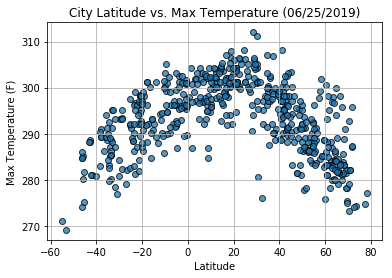

In [7]:
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']

#Plotting the graph
plt.scatter(x_axis,y_axis, marker="o",edgecolors="black",
         alpha=0.75)
plt.grid()

## Set textual properties
plt.title("City Latitude vs. Max Temperature (06/25/2019)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
#plt.ylim(30, 100)

#Saving the graph
plt.savefig("LatvsTemp.png")

#Show the graph
plt.show()

#### Latitude vs. Humidity Plot

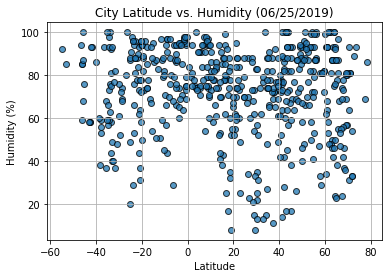

In [10]:
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']

#Plotting the graph
plt.scatter(x_axis,y_axis, marker="o",edgecolors="black",
         alpha=0.75)
plt.grid()
#plt.ylim(0, 100)
# Set textual properties
plt.title("City Latitude vs. Humidity (06/25/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

#Saving the graph
plt.savefig("LatvsHumidity.png")

#Show the graph
plt.show()

#### Latitude vs. Cloudiness Plot

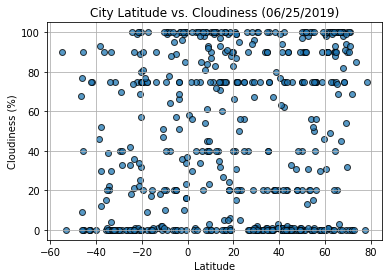

In [11]:
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']

#Plotting the graph
plt.scatter(x_axis,y_axis, marker="o",edgecolors="black",
         alpha=0.75)
plt.grid()

# Set textual properties
plt.title("City Latitude vs. Cloudiness (06/25/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

#Saving the graph
plt.savefig("LatvsCloudiness.png")

#Show the graph
plt.show()

#### Latitude vs. Wind Speed Plot

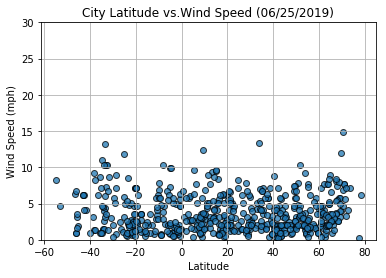

In [12]:
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']

#Plotting the graph
plt.scatter(x_axis,y_axis, marker="o",edgecolors="black",
         alpha=0.75)
plt.grid()
plt.ylim(0, 30)

# Set textual properties
plt.title("City Latitude vs.Wind Speed (06/25/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

#Saving the graph
plt.savefig("LatvsWindSpeed.png")

#Show the graph
plt.show()

Analysis:
    1) The temperatures are more near the equator and mellow down as the latitude is far away from the equator.
    2) Latitude does not make any difference with respect to wind speed and cloudiness
    3) Its more humid near the equator.